In [34]:
## Include Statements

import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import os
import re

In [35]:
# Build CSV File

f = open("sotuwords.csv", "w+")
f.write("name,date,countWar,countPeace,countGod,countProvidence,countHeaven,countTotal\n")
    
for filename in os.listdir(os.getcwd() + "/state-of-the-union-address-texts"):
    name = filename.split("[")
    name = name[0]
    name = name[:-1]
    date = filename[-10:-5]
    
    filepath = os.getcwd() + "/state-of-the-union-address-texts/" + filename
    
    reWar = "[\s,.]war[\s,.'s][\ss]?"
    rePeace = "[\s,.]peace[\s,.'ful']?"
    reGod = "[\s,.]god[\s,.'s][\ss]?" #[\s,.''s']"
    reProvidence = "[\s,.]providence[\s,.]"
    reHeaven = "[\s,.]heaven[\s,.]"
    reTotal = "\w+"

    file  = open(filepath, 'r', encoding = "ISO-8859-1").read()
    countWar = len(re.findall(reWar, file, re.IGNORECASE))
    countPeace = len(re.findall(rePeace, file, re.IGNORECASE))
    countGod = len(re.findall(reGod, file, re.IGNORECASE))
    countProvidence = len(re.findall(reProvidence, file, re.IGNORECASE))
    countHeaven = len(re.findall(reHeaven, file, re.IGNORECASE))
    countTotal = len(re.findall(reTotal, file, re.IGNORECASE))
    
    f.write(name + ",")
    f.write(date + ",")
    f.write(str(countWar) + ",")
    f.write(str(countPeace) + ",")
    f.write(str(countGod) + ",")
    f.write(str(countProvidence) + ",")
    f.write(str(countHeaven) + ",")
    f.write(str(countTotal) + "\n")


In [36]:
## Create Dataframe from File

data = pd.read_csv("sotuwords.csv", index_col=1)
data = data.sort_index()
print(data)

                    name  countWar  countPeace  countGod  countProvidence  \
date                                                                        
1790   George Washington         3           1         0                0   
1791   George Washington         1           4         0                0   
1792   George Washington         1           5         0                1   
1793   George Washington         4           6         0                0   
1794   George Washington         1           4         0                0   
1795   George Washington         4           4         0                0   
1796   George Washington        12           5         0                0   
1797          John Adams         4           4         0                2   
1798          John Adams         5           5         0                2   
1799          John Adams         3           0         0                1   
1800          John Adams         1           0         0                0   

In [37]:
## Create Database from Data Frame

conn = sqlite3.connect("sotuwords.db")
data.to_sql("sotuwords", conn, if_exists="replace")

In [59]:
# SQL Queries

sqlAll = "SELECT date, name, countTotal FROM sotuwords"
sqlAllCompare = "SELECT date, name, countWar, countPeace FROM sotuwords"
sqlColdWar = "SELECT date, name, countWar, countPeace FROM sotuwords WHERE date >= 1947"

sqlWarOverPeace = "SELECT date FROM sotuwords WHERE countWar > countPeace"
sqlPeaceOverWar = "SELECT date FROM sotuwords WHERE countPeace > countWar"
sqlWarPeace = "SELECT date FROM sotuWords WHERE countWar == countPeace"

dfColdWar = pd.read_sql(sqlColdWar, conn)
dfAllCompare = pd.read_sql(sqlAllCompare, conn)
dfAll = pd.read_sql(sqlAll, conn)

countWarOverPeace = len(pd.read_sql(sqlWarOverPeace, conn))
countPeaceOverWar = len(pd.read_sql(sqlPeaceOverWar, conn))
countWarPeace = len(pd.read_sql(sqlWarPeace, conn))

In [41]:
## Print Data Frame for Total Word Count for all SOTU Addresses

print(dfAll)

     date                name  countTotal
0    1790   George Washington        1411
1    1791   George Washington        2314
2    1792   George Washington        2102
3    1793   George Washington        1971
4    1794   George Washington        2920
5    1795   George Washington        1986
6    1796   George Washington        2879
7    1797          John Adams        2060
8    1798          John Adams        2218
9    1799          John Adams        1505
10   1800          John Adams        1374
11   1801    Thomas Jefferson        3228
12   1802    Thomas Jefferson        2205
13   1803    Thomas Jefferson        2273
14   1804    Thomas Jefferson        2103
15   1805    Thomas Jefferson        2934
16   1806    Thomas Jefferson        2870
17   1807    Thomas Jefferson        2397
18   1808    Thomas Jefferson        2683
19   1809       James Madison        1832
20   1810       James Madison        2451
21   1811       James Madison        2275
22   1812       James Madison     

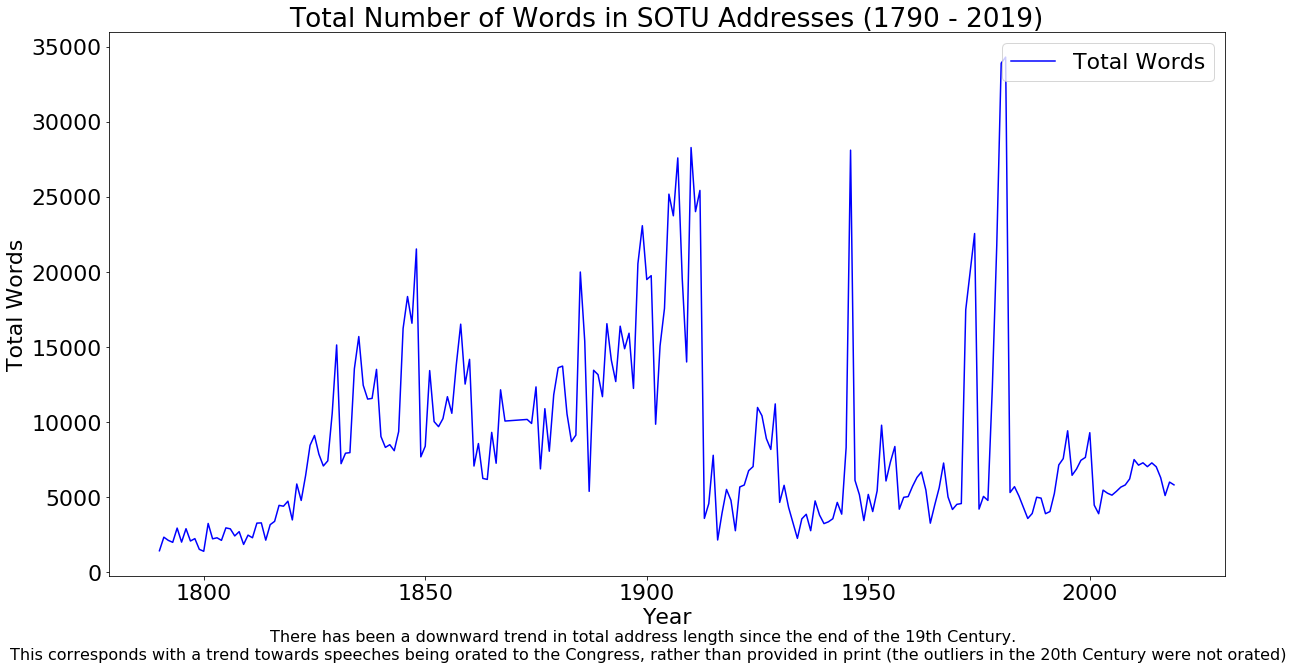

In [71]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.plot(dfAll.date, dfAll.countTotal, label="Total Words", color="blue")
plt.xlabel('Year')
plt.ylabel('Total Words')
plt.legend(loc='upper right')
plt.title('Total Number of Words in SOTU Addresses (1790 - 2019)')
txtCaption = 'There has been a downward trend in total address length since the end of the 19th Century.  \nThis corresponds with a trend towards speeches being orated to the Congress, rather than provided in print (the outliers in the 20th Century were not orated)'
plt.figtext(0.5, 0.01, txtCaption, wrap=True, horizontalalignment='center', fontsize=16)
plt.show()

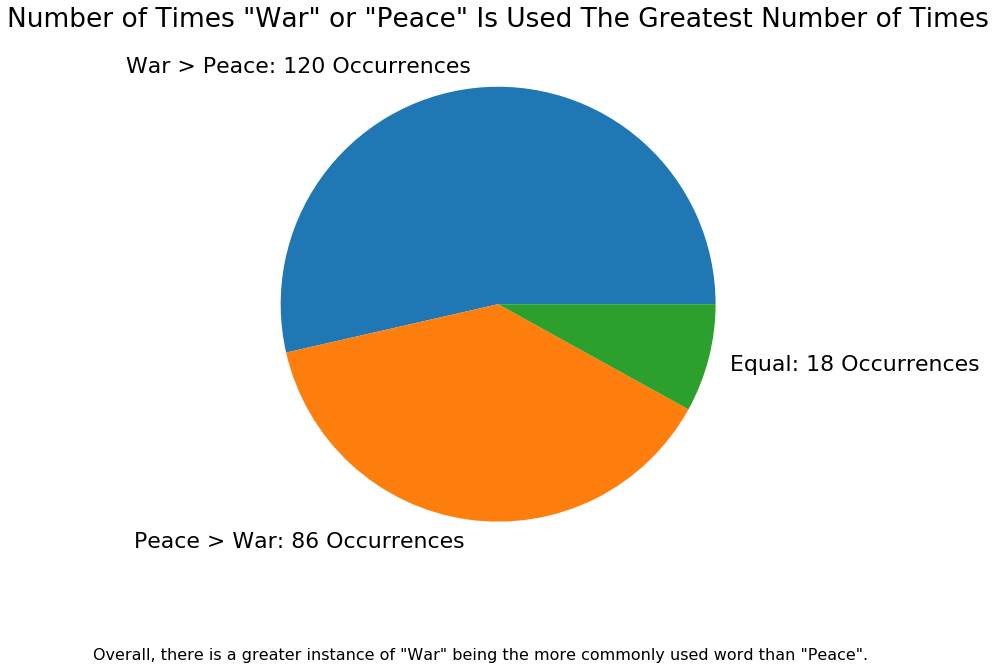

In [69]:
## Create Pie Chart 

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.pie([countWarOverPeace, countPeaceOverWar, countWarPeace], labels=["War > Peace: " + str(countWarOverPeace) + " Occurrences", "Peace > War: " + str(countPeaceOverWar) + " Occurrences", "Equal: " + str(countWarPeace) + " Occurrences"])
plt.title('Number of Times "War" or "Peace" Is Used The Greatest Number of Times')
txtCaption = 'Overall, there is a greater instance of "War" being the more commonly used word than "Peace".'
plt.figtext(0.5, 0.01, txtCaption, wrap=True, horizontalalignment='center', fontsize=16)
plt.show()

In [60]:
## Print Data Frame for All Speeches Comparisons

print(dfAllCompare)

     date                name  countWar  countPeace
0    1790   George Washington         3           1
1    1791   George Washington         1           4
2    1792   George Washington         1           5
3    1793   George Washington         4           6
4    1794   George Washington         1           4
5    1795   George Washington         4           4
6    1796   George Washington        12           5
7    1797          John Adams         4           4
8    1798          John Adams         5           5
9    1799          John Adams         3           0
10   1800          John Adams         1           0
11   1801    Thomas Jefferson         8           9
12   1802    Thomas Jefferson         3           5
13   1803    Thomas Jefferson         4           8
14   1804    Thomas Jefferson         7           7
15   1805    Thomas Jefferson         5          10
16   1806    Thomas Jefferson         6           7
17   1807    Thomas Jefferson         2          12
18   1808   

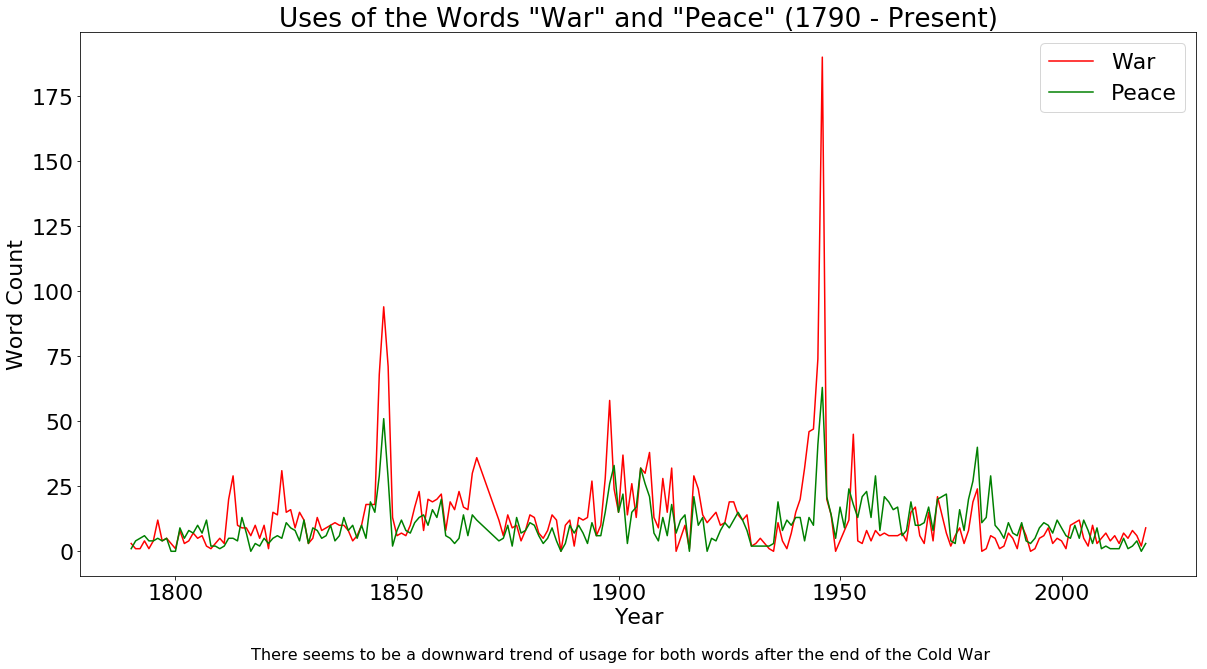

In [64]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.plot(dfAllCompare.date, dfAllCompare.countWar, label="War", color="red")
plt.plot(dfAllCompare.date, dfAllCompare.countPeace, label="Peace", color="green")
plt.title('Uses of the Words "War" and "Peace" (1790 - Present)')
plt.xlabel('Year')
plt.ylabel('Word Count')
plt.legend(loc='upper right')
txtCaption = "There seems to be a downward trend of usage for both words after the end of the Cold War"
plt.figtext(0.5, 0.01, txtCaption, wrap=True, horizontalalignment='center', fontsize=16)

plt.show()

In [39]:
## Print Data Frame for Cold War Comparisons

print(dfColdWar)

    date                  name  countWar  countPeace
0   1947       Harry S. Truman        20          21
1   1948       Harry S. Truman        14          14
2   1949       Harry S. Truman         0           5
3   1950       Harry S. Truman         4          17
4   1951       Harry S. Truman         8           9
5   1952       Harry S. Truman        12          24
6   1953       Harry S. Truman        45          18
7   1954  Dwight D. Eisenhower         4          13
8   1955  Dwight D. Eisenhower         3          21
9   1956  Dwight D. Eisenhower         8          23
10  1957  Dwight D. Eisenhower         4          13
11  1958  Dwight D. Eisenhower         8          29
12  1959  Dwight D. Eisenhower         6           8
13  1960  Dwight D. Eisenhower         7          21
14  1961  Dwight D. Eisenhower         6          19
15  1962       John F. Kennedy         6          16
16  1963       John F. Kennedy         6          17
17  1964     Lyndon B. Johnson         7      

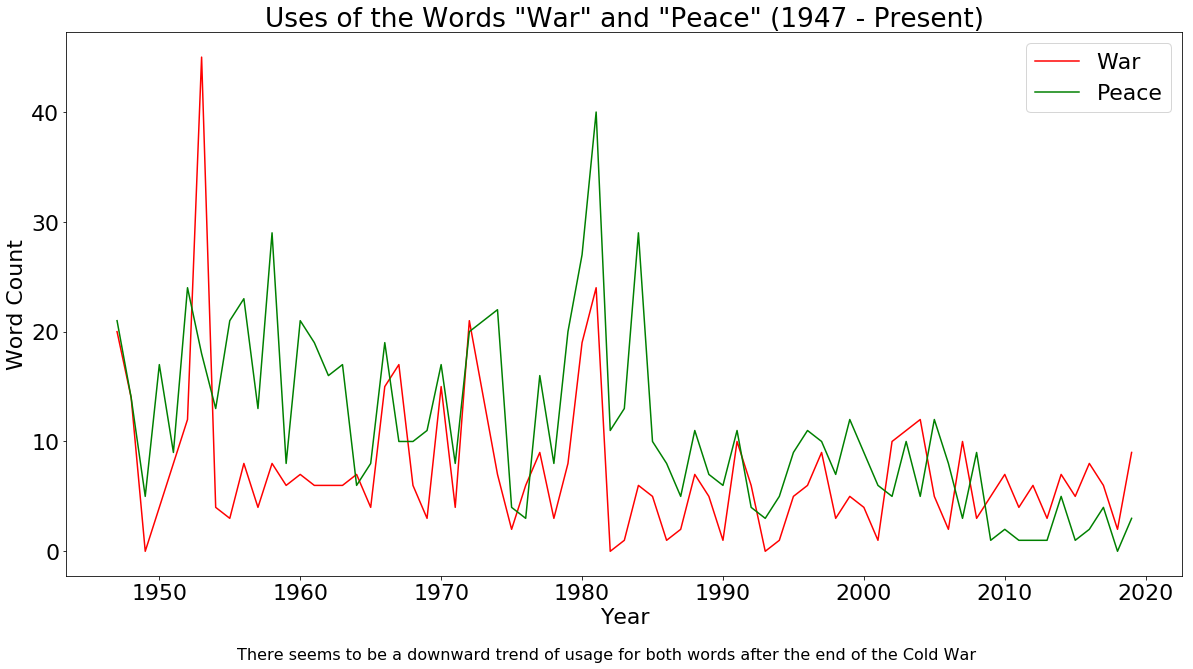

In [72]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.plot(dfColdWar.date, dfColdWar.countWar, label="War", color="red")
plt.plot(dfColdWar.date, dfColdWar.countPeace, label="Peace", color="green")
plt.xlabel('Year')
plt.ylabel('Word Count')
plt.title('Uses of the Words "War" and "Peace" (1947 - Present)')
txtCaption = "There seems to be a downward trend of usage for both words after the end of the Cold War"
plt.figtext(0.5, 0.01, txtCaption, wrap=True, horizontalalignment='center', fontsize=16)
plt.legend(loc='upper right')
plt.show()